# Лабораторная работа Питон

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [1]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [4]:

URL = 'https://api.hh.ru/vacancies'

professions = ["Экскурсовод", "Архитектор", "Учитель математики", "Бухгалтер", "Певец"]

def get_params(profession_index, professions):
    params = {
        'text': professions[profession_index],
        'area': 1,
        'per_page': 100
    }
    return params

vacancies = []

for profession_index in range(len(professions)):
    vacancies.append([])
    params = get_params(profession_index, professions)
    data = requests.get(URL, params).json()
    for page_index in range(data['pages']):
        params['page'] = page_index
        data = requests.get(URL, params).json()
        for vacancy in data['items']:
            vacancies[profession_index].append(vacancy)


for profession_index in range(len(professions)):
    print(professions[profession_index])
    print(f"Количество вакансий: {len(vacancies[profession_index])}")
    print(f"Пример\n {vacancies[profession_index][0]}")
    

Экскурсовод
Количество вакансий: 95
Пример
 {'id': '98432903', 'premium': False, 'name': 'Официант в Izakkaya Nikei', 'department': None, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': {'from': 200000, 'to': None, 'currency': 'RUR', 'gross': False}, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': {'city': 'Москва', 'street': 'Рождественский бульвар', 'building': '1', 'lat': 55.766749, 'lng': 37.624211, 'description': None, 'raw': 'Москва, Рождественский бульвар, 1', 'metro': {'station_name': 'Кузнецкий мост', 'line_name': 'Таганско-Краснопресненская', 'station_id': '7.67', 'line_id': '7', 'lat': 55.761498, 'lng': 37.624423}, 'metro_stations': [{'station_name': 'Кузнецкий мост', 'line_name': 'Таганско-Краснопресненская', 'station_id': '7.67', 'line_id': '7', 'lat': 55.761498, 'lng': 37.624423}, {'station_name': 'Трубная', 'line_name': 'Люблинско-Дмитровская', 'station_id': '10.177', 'line_

(1 балл) Посчитайте сколько всего найдено вакансий:

In [5]:

count_vacancies = 0
for profession_index in range(len(vacancies)):
    count_vacancies += len(vacancies[profession_index])
print(count_vacancies)

4377


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [6]:
class Company:
    
    def __init__(self, name, latitude, longitude):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude

print("Не знаю что тут можно вывести")

Не знаю что тут можно вывести


(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [7]:

companies = []
for profession_index in range(len(vacancies)):
    companies.append([])
    for vacancy_index in range(len(vacancies[profession_index])):
        if not(vacancies[profession_index][vacancy_index]['employer'] == None):
            vacancy_name = str(vacancies[profession_index][vacancy_index]['employer']['name'])
        else:
            vacancy_name = "None"
        if not(vacancies[profession_index][vacancy_index]['address'] == None) and not(vacancies[profession_index][vacancy_index]['address']['lat'] == None):
            vacancy_latitude = float(vacancies[profession_index][vacancy_index]['address']['lat'])
        else:
            vacancy_latitude = None
        if not(vacancies[profession_index][vacancy_index]['address'] == None) and not(vacancies[profession_index][vacancy_index]['address']['lng'] == None):
            vacancy_longitude = float(vacancies[profession_index][vacancy_index]['address']['lng'])
        else:
            vacancy_longitude = None
        company = Company(vacancy_name, vacancy_latitude, vacancy_longitude)
        companies[profession_index].append(company)

count_companies = 0
for profession_index in range(len(professions)):
    count_companies += len(companies[profession_index])
    print(professions[profession_index])
    print(f"Количество вакансий: {len(companies[profession_index])}")
print(f"Всего: {count_companies}")

Экскурсовод
Количество вакансий: 95
Архитектор
Количество вакансий: 2000
Учитель математики
Количество вакансий: 280
Бухгалтер
Количество вакансий: 2000
Певец
Количество вакансий: 2
Всего: 4377


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [8]:

count = 0
for profession_index in range(5):
    for vacancy in range(len(vacancies[profession_index])):
        if not(vacancies[profession_index][vacancy]['address'] == None) and not(vacancies[profession_index][vacancy]['address']['lat'] == None) and not(vacancies[profession_index][vacancy]['address']['lng'] == None):
            count += 1
print(count)

2760


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [9]:

from geopy.distance import geodesic as GD
moscow_vacancies = []
center = (55.752919, 37.626941)
radius = 17
for profession_index in range(5):
    for vacancy in range(len(vacancies[profession_index])):
        if not(vacancies[profession_index][vacancy]['address'] == None) and not(vacancies[profession_index][vacancy]['address']['lat'] == None) and not(vacancies[profession_index][vacancy]['address']['lng'] == None):
            coords = (vacancies[profession_index][vacancy]['address']['lat'], vacancies[profession_index][vacancy]['address']['lng'])
            diff = GD(center, coords).km
            if (diff < radius):
                moscow_vacancies.append(vacancies[profession_index][vacancy])
print(f"Количество таких вакансий: {len(moscow_vacancies)}")

Количество таких вакансий: 2471


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [10]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /Users/mihailakusin/Desktop/ПитонПрактикум/yakushin-mg-lab_python/diamonds.csv
100%|██████████████████████████████████████| 35.4M/35.4M [00:13<00:00, 2.54MB/s]


Создадим DataFrame:

In [11]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [12]:

diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [13]:

print(len(diamonds))

219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [14]:

print(f"{diamonds['total_sales_price'].idxmax()} - {diamonds['total_sales_price'].max()}")
print(f"{diamonds['total_sales_price'].idxmin()} - {diamonds['total_sales_price'].min()}")

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [15]:

propusk_count = 0
for i in diamonds.values:
    for value in i:
        if (value == "unknown" or value == "None"):
            propusk_count += 1

print(propusk_count)

1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [16]:

columns = []
for column in diamonds.keys():
    for value in diamonds.get(column):
        if (value == "unknown" or value == "None"):
            columns.append(column)
            break

print(*columns)

color cut_quality eye_clean culet_size culet_condition girdle_min girdle_max fluor_color fluor_intensity fancy_color_dominant_color fancy_color_secondary_color fancy_color_overtone fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [17]:

columns_count = 0
for column in diamonds.keys():
    if (column[:12] == "fancy_color_") or (column[:6] == "fluor_"):
        columns_count += 1

print(columns_count)

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [18]:

ne_propusk_count = 0
for column in diamonds.keys():
    if (column[:12] == "fancy_color_") or (column[:6] == "fluor_"):
        for value in diamonds.get(column):
            if (value != "unknown" and value != "None"):
                ne_propusk_count += 1

print(ne_propusk_count)

256727


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [19]:

print(f"Длина до: {len(diamonds.keys())}")
for column in diamonds.keys():
    if (column[:12] == "fancy_color_") or (column[:6] == "fluor_"):
        diamonds.drop(column, axis=1, inplace=True)
print(f"Длина после: {len(diamonds.keys())}")

Длина до: 26
Длина после: 20


(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [20]:

columns_count = 0
for column in diamonds.keys():
    if (column[:6] == "culet_"):
        columns_count += 1

print(columns_count)

ne_propusk_count = 0
for column in diamonds.keys():
    if (column[:6] == "culet_"):
        for value in diamonds.get(column):
            if (value != "unknown" and value != "None"):
                ne_propusk_count += 1

print(ne_propusk_count)

print(f"Длина до: {len(diamonds.keys())}")
for column in diamonds.keys():
    if (column[:6] == "culet_"):
        diamonds.drop(column, axis=1, inplace=True)
print(f"Длина после: {len(diamonds.keys())}")

2
149282
Длина до: 20
Длина после: 18


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [21]:

dollars = 0
for price in diamonds.get("total_sales_price"):
    dollars += price

print(dollars / 1000)

1517721.991


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [22]:

print(diamonds[::2])

        Unnamed: 0    cut    color clarity  carat_weight cut_quality  lab  \
0                0  Round        E    VVS2          0.09   Excellent  IGI   
2                2  Round        E    VVS2          0.09   Excellent  IGI   
4                4  Round        E    VVS2          0.09   Very Good  IGI   
6                6  Round        E    VVS2          0.09   Very Good  IGI   
8                8  Round        E    VVS2          0.09   Very Good  IGI   
...            ...    ...      ...     ...           ...         ...  ...   
219694      219695  Round        D      IF         12.52   Excellent  HRD   
219696      219697   Oval        H     VS2         18.88     unknown  GIA   
219698      219699  Round        E     VS1         10.65   Excellent  GIA   
219700      219701  Round        E     VS1         18.07   Excellent  GIA   
219702      219703   Pear  unknown    VVS2         10.03     unknown  GIA   

         symmetry     polish eye_clean  depth_percent  table_percent  \
0  

(0.5 балла) А теперь с индексами, кратными 6:

In [23]:

print(diamonds[::6])

        Unnamed: 0      cut    color clarity  carat_weight cut_quality  lab  \
0                0    Round        E    VVS2          0.09   Excellent  IGI   
6                6    Round        E    VVS2          0.09   Very Good  IGI   
12              12    Round        E    VVS2          0.09   Very Good  IGI   
18              18    Round        E    VVS2          0.09   Excellent  IGI   
24              24    Round        L      I1          0.34   Excellent  IGI   
...            ...      ...      ...     ...           ...         ...  ...   
219678      219679    Round        G     VS1         10.23   Excellent  GIA   
219684      219685  Radiant  unknown      I1          0.89     unknown  GIA   
219690      219691    Round        D    VVS2         10.10   Excellent  GIA   
219696      219697     Oval        H     VS2         18.88     unknown  GIA   
219702      219703     Pear  unknown    VVS2         10.03     unknown  GIA   

         symmetry     polish eye_clean  depth_perce

(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [24]:

print(diamonds.select_dtypes(include=['object', 'category']))

             cut    color clarity cut_quality  lab   symmetry     polish  \
0          Round        E    VVS2   Excellent  IGI  Very Good  Very Good   
1          Round        E    VVS2   Very Good  IGI  Very Good  Very Good   
2          Round        E    VVS2   Excellent  IGI  Very Good  Very Good   
3          Round        E    VVS2   Excellent  IGI  Very Good  Very Good   
4          Round        E    VVS2   Very Good  IGI  Very Good  Excellent   
...          ...      ...     ...         ...  ...        ...        ...   
219698     Round        E     VS1   Excellent  GIA  Excellent  Excellent   
219699   Radiant  unknown     VS2     unknown  GIA  Very Good  Very Good   
219700     Round        E     VS1   Excellent  GIA  Excellent  Excellent   
219701  Princess  unknown     SI2     unknown  GIA       Good       Good   
219702      Pear  unknown    VVS2     unknown  GIA  Very Good  Excellent   

       eye_clean girdle_min girdle_max  
0        unknown          M          M  
1    

>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [35]:

print("Так как матрица получается большой и это не посчитается, я изменил ее размеры до 5 значений\n"
      "Идейно решение остается таким же")
matrix = diamonds['total_sales_price'].values
matrix = matrix[0:5]
matrix = np.expand_dims(matrix, axis=1)
Tmatrix = np.transpose(matrix)
result = np.dot(matrix, Tmatrix)
print(result)

Так как матрица получается большой и это не посчитается, я изменил ее размеры до 5 значений
Идейно решение остается таким же
[[12802084  4035984  2611940 22713144  3356164]
 [ 4035984  1272384   823440  7160544  1058064]
 [ 2611940   823440   532900  4634040   684740]
 [22713144  7160544  4634040 40297104  5954424]
 [ 3356164  1058064   684740  5954424   879844]]


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

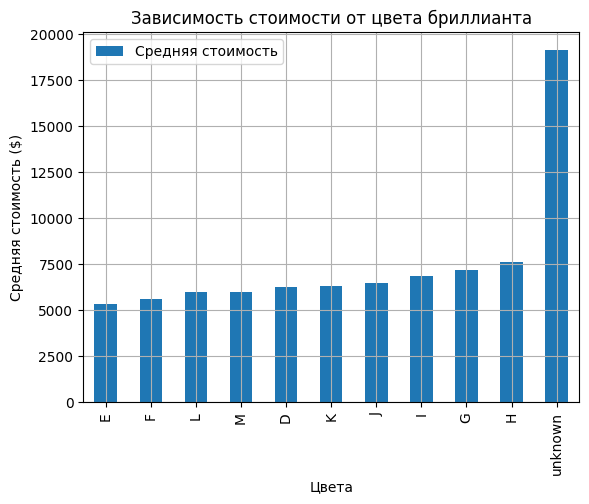

In [26]:

cleaned_data = diamonds.dropna(subset=['color', 'total_sales_price'])
average_price_by_color = cleaned_data.groupby('color')['total_sales_price'].mean().sort_values()
average_price_by_color.plot(kind='bar')
plt.title('Зависимость стоимости от цвета бриллианта')
plt.xlabel('Цвета')
plt.ylabel('Средняя стоимость ($)')
plt.grid(True)
plt.legend(['Средняя стоимость'])
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

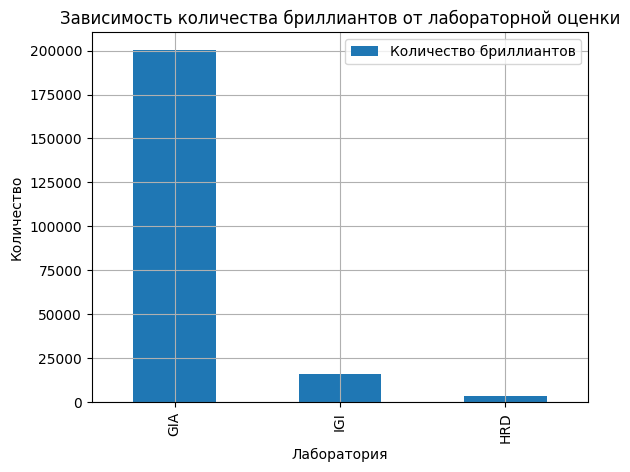

In [27]:

cleaned_data = diamonds.dropna(subset=['lab'])
lab_counts = cleaned_data['lab'].value_counts()
lab_counts.plot(kind='bar')
plt.title('Зависимость количества бриллиантов от лабораторной оценки')
plt.xlabel('Лаборатория')
plt.ylabel('Количество')
plt.legend(['Количество бриллиантов'])
plt.grid(True)
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

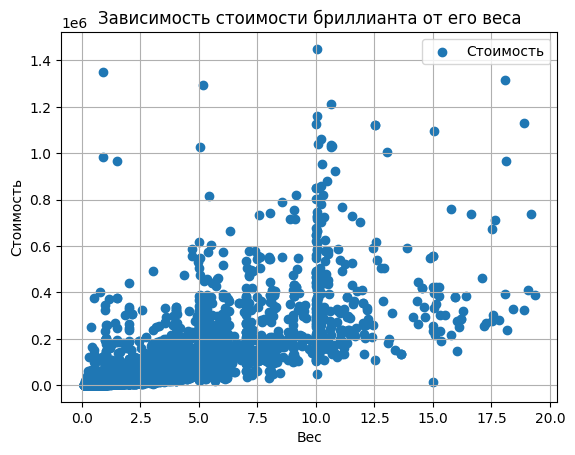

In [28]:

cleaned_data = diamonds.dropna(subset=['carat_weight', 'total_sales_price'])
plt.scatter(cleaned_data['carat_weight'], cleaned_data['total_sales_price'])
plt.title('Зависимость стоимости бриллианта от его веса')
plt.xlabel('Вес')
plt.ylabel('Cтоимость')
plt.legend(['Стоимость'])
plt.grid(True)
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

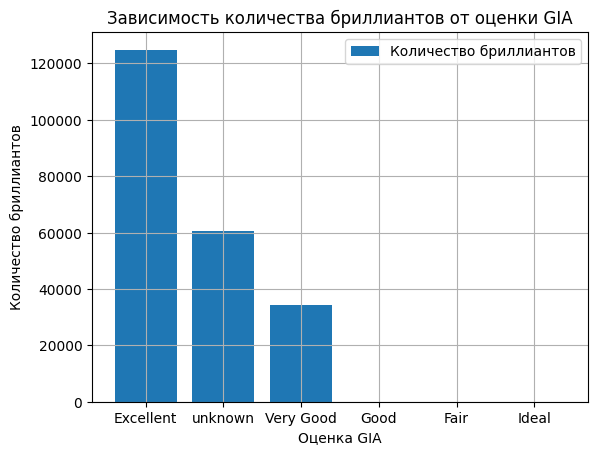

In [29]:

cleaned_data = diamonds.dropna(subset=['cut_quality'])
cut_quality_counts = cleaned_data['cut_quality'].value_counts()
plt.bar(cut_quality_counts.index, cut_quality_counts)
plt.title('Зависимость количества бриллиантов от оценки GIA')
plt.xlabel('Оценка GIA')
plt.ylabel('Количество бриллиантов')
plt.legend(['Количество бриллиантов'])
plt.grid(True)
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :) 
Лабораторная работа была сложной.
1) Cредняя стоимость чаще всего увеличивается с увеличением буквы, обозначающей этот цвет
2) Бриллиантов с оценкой GIA больше всего
3) Не всегда стоимость бриллианта зависит от его веса, так как большой бриллиант может почти ничего не стоить (скорее всего из-за своего качества), а маленький - быть одним из самых дорогих
4) Превосходный бриллиантов больше всего

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [30]:

diamonds = diamonds[["meas_length","meas_width", "meas_depth", "total_sales_price"]]
diamonds.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [31]:

diamonds = diamonds.sample(frac=1)
diamonds.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
145475,5.08,5.11,3.14,3578
74825,4.34,4.37,2.62,1128
20058,4.30,4.33,2.64,730
171761,6.34,4.85,3.36,6348
51597,3.92,3.94,2.47,938
118383,5.49,4.07,2.88,2340
2543,3.90,3.94,2.26,458
83175,6.71,3.47,2.92,1204
82206,4.52,4.55,2.85,1220
163519,9.38,5.53,3.28,5031


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [32]:

def minkowski_sum(row):
    return ((abs(row['meas_length'] - row['meas_width']))**3 + (abs(row['meas_width'] - row['meas_depth']))**3 + (abs(row['meas_length'] - row['meas_depth']))**3)**(1/3)

diamonds['minkowski_sum'] = diamonds.apply(minkowski_sum, axis=1)
diamonds.head(10)

,meas_length,meas_width,meas_depth,total_sales_price,minkowski_sum
145475,5.08,5.11,3.14,3578,2.463292
74825,4.34,4.37,2.62,1128,2.186128
20058,4.30,4.33,2.64,730,2.110539
171761,6.34,4.85,3.36,6348,3.210108
51597,3.92,3.94,2.47,938,1.839572
118383,5.49,4.07,2.88,2340,2.815897
2543,3.90,3.94,2.26,458,2.091777
83175,6.71,3.47,2.92,1204,4.458357
82206,4.52,4.55,2.85,1220,2.123137
163519,9.38,5.53,3.28,5031,6.660225


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [33]:

dataset2 = diamonds[["minkowski_sum", "total_sales_price"]]
dataset2.head(10)

,minkowski_sum,total_sales_price
145475,2.463292,3578
74825,2.186128,1128
20058,2.110539,730
171761,3.210108,6348
51597,1.839572,938
118383,2.815897,2340
2543,2.091777,458
83175,4.458357,1204
82206,2.123137,1220
163519,6.660225,5031


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)